<a href="https://colab.research.google.com/github/hmdaalln/Group7/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your 30° object photos (card/cover/notebook) → into 'objects'
Choose object images…


Saving card_tilt_30_cropped.jpg to card_tilt_30_cropped.jpg
Saving cover_tilt_30_cropped.jpg to cover_tilt_30_cropped.jpg
Saving notebook_tilt_30_cropped.jpg to notebook_tilt_30_cropped.jpg
[uploaded] /content/asg3/inputs/objects/card_tilt_30_cropped.jpg
[uploaded] /content/asg3/inputs/objects/cover_tilt_30_cropped.jpg
[uploaded] /content/asg3/inputs/objects/notebook_tilt_30_cropped.jpg

Upload your gallery backgrounds (galleryimage1/2/3) → into 'gallery'
Choose gallery backgrounds…


Saving galleryimage1.png to galleryimage1.png
Saving galleryimage2.png to galleryimage2.png
Saving galleryimage3.png to galleryimage3.png
[uploaded] /content/asg3/inputs/gallery/galleryimage1.png
[uploaded] /content/asg3/inputs/gallery/galleryimage2.png
[uploaded] /content/asg3/inputs/gallery/galleryimage3.png

Upload your Q3 250×250 top-down images (artworks to hang) → into 'artworks'
Choose artwork images…


Saving card_tilt_30_cropped_topdown_250.jpg to card_tilt_30_cropped_topdown_250.jpg
Saving cover_tilt_30_cropped_topdown_250.jpg to cover_tilt_30_cropped_topdown_250.jpg
Saving notebook_tilt_30_cropped_topdown_250.jpg to notebook_tilt_30_cropped_topdown_250.jpg
[uploaded] /content/asg3/inputs/artworks/card_tilt_30_cropped_topdown_250.jpg
[uploaded] /content/asg3/inputs/artworks/cover_tilt_30_cropped_topdown_250.jpg
[uploaded] /content/asg3/inputs/artworks/notebook_tilt_30_cropped_topdown_250.jpg

=== Running Q3 → Q9 automatically ===
[warn] no rectangle found in card_tilt_30_cropped.jpg
[warn] no rectangle found in cover_tilt_30_cropped.jpg
[warn] no rectangle found in notebook_tilt_30_cropped.jpg
[info] downloading ASG3.JPG from Unsplash…
[saved] /content/asg3/ASG3.JPG
[saved] /content/asg3/outputs/Q4_pixel_ops/ASG3_400x400.jpg
[saved] /content/asg3/outputs/Q4_pixel_ops/ASG3_R.jpg
[saved] /content/asg3/outputs/Q4_pixel_ops/ASG3_G.jpg
[saved] /content/asg3/outputs/Q4_pixel_ops/ASG3_B.j

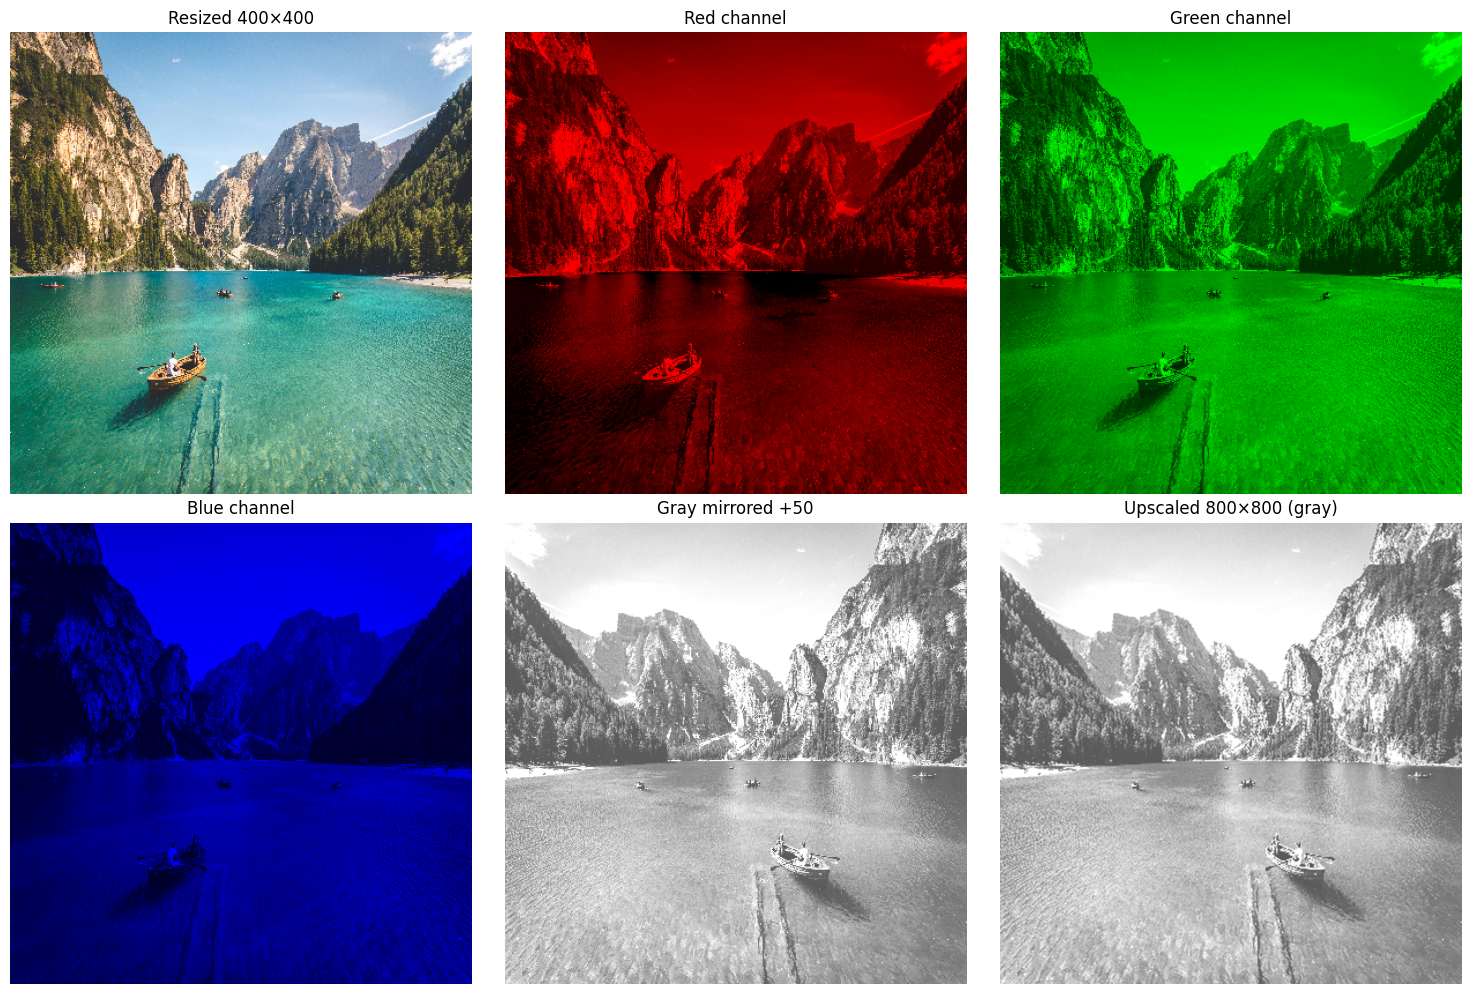

[saved] /content/asg3/outputs/Q5_filters/T5_noisy.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_smooth_3x3.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_median_3x3.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_gaussian_3x3.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_smooth_5x5.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_median_5x5.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_gaussian_5x5.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_smooth_7x7.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_median_7x7.jpg
[saved] /content/asg3/outputs/Q5_filters/T5_gaussian_7x7.jpg


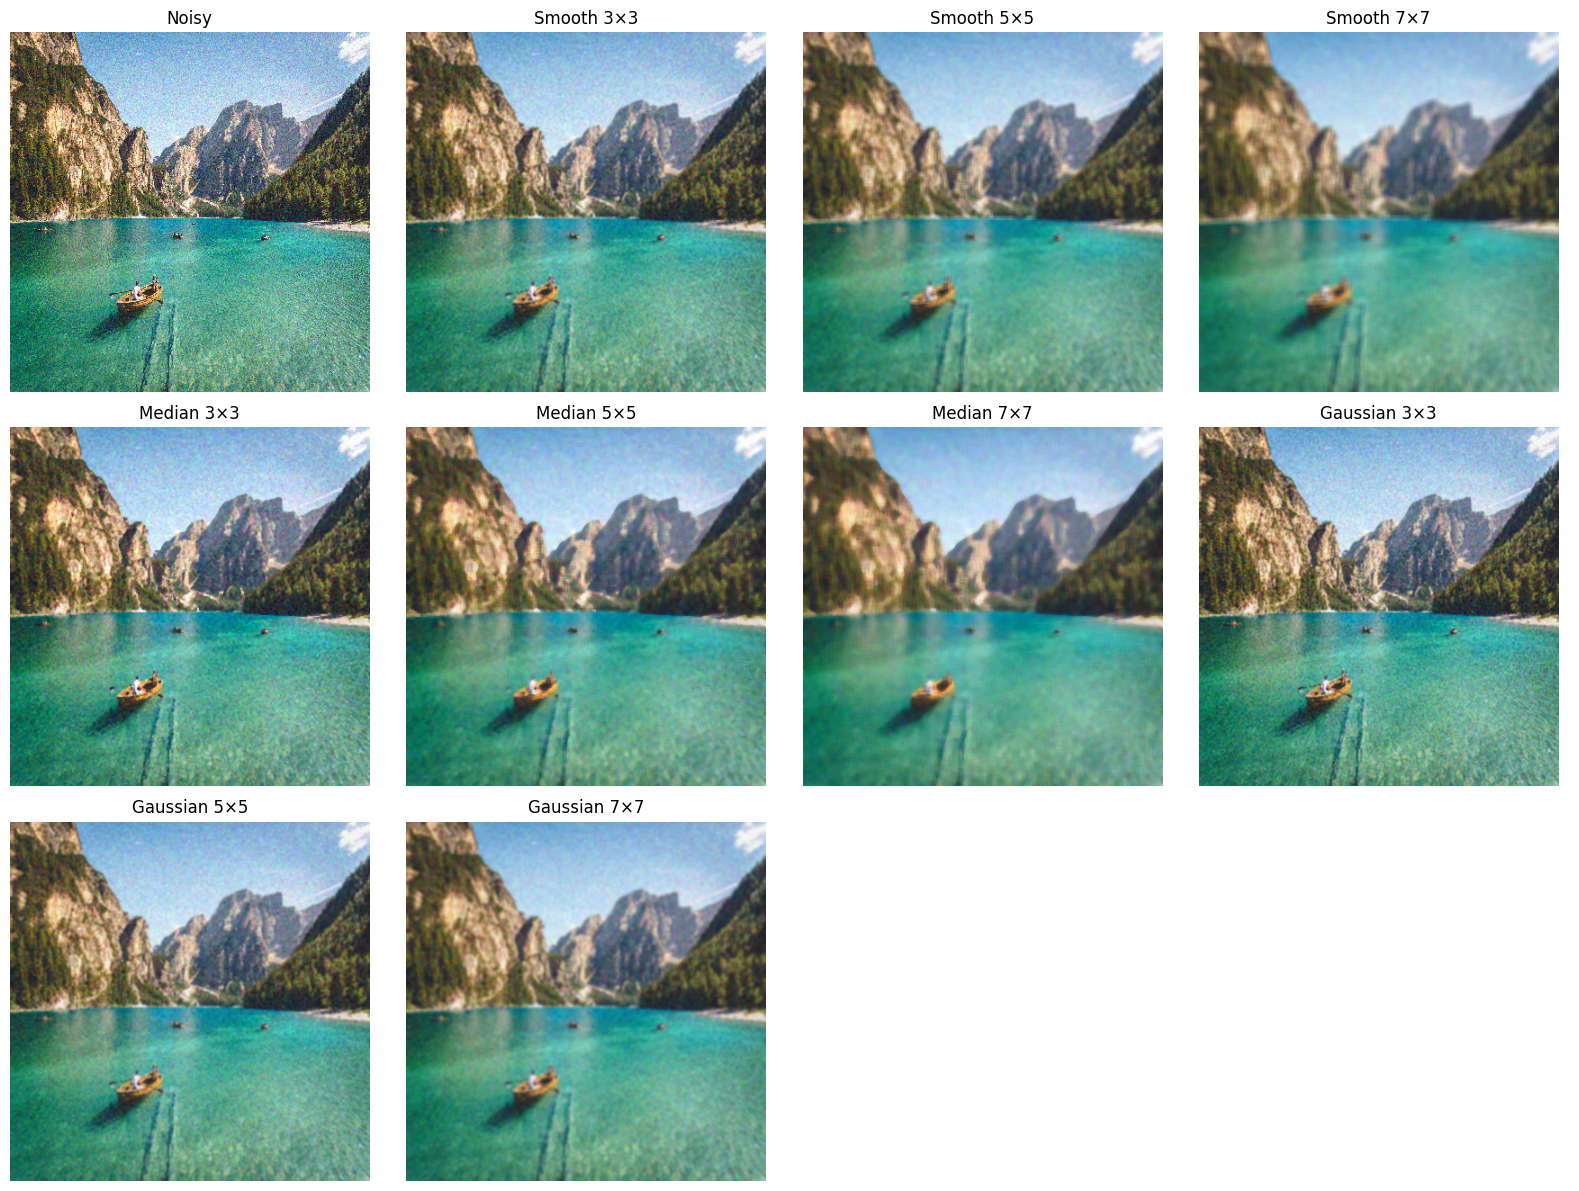

[saved] /content/asg3/outputs/Q6_sp/T6_sp_noisy.jpg
[saved] /content/asg3/outputs/Q6_sp/T6_median_5x5_zero.jpg
[saved] /content/asg3/outputs/Q6_sp/T6_median_5x5_circular.jpg
[saved] /content/asg3/outputs/Q6_sp/T6_median_5x5_symm.jpg


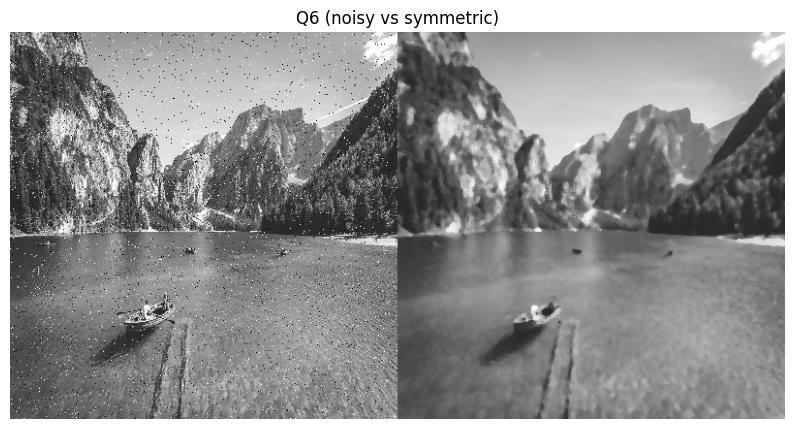

[saved] /content/asg3/outputs/Q7_sharpen/T7_original_400x400.jpg
[saved] /content/asg3/outputs/Q7_sharpen/T7_sharpen_400x400.jpg


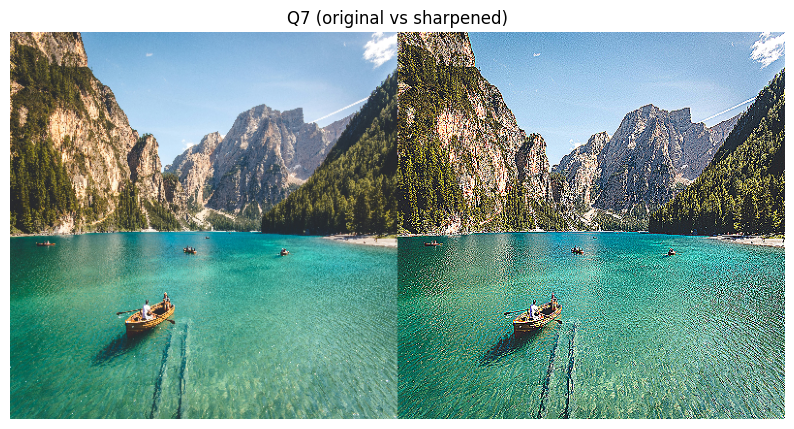

[saved] /content/asg3/outputs/Q8_threshold/T8_gray_400x400.jpg
[saved] /content/asg3/outputs/Q8_threshold/T8_threshold_400x400.jpg


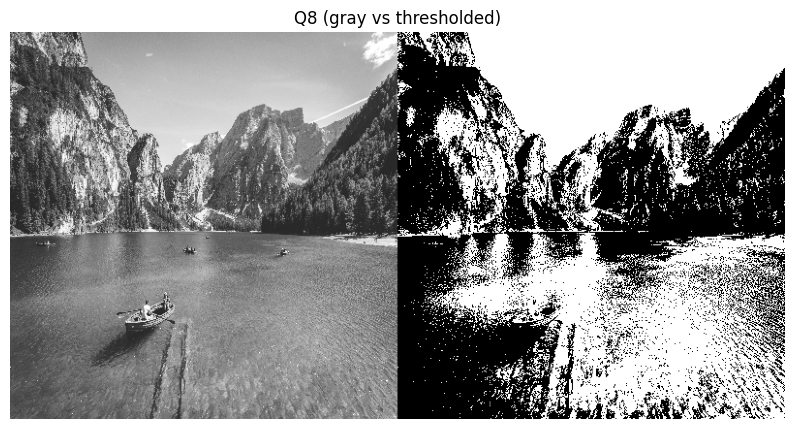

[saved] /content/asg3/outputs/Q9_gallery/galleryimage1_final.jpg


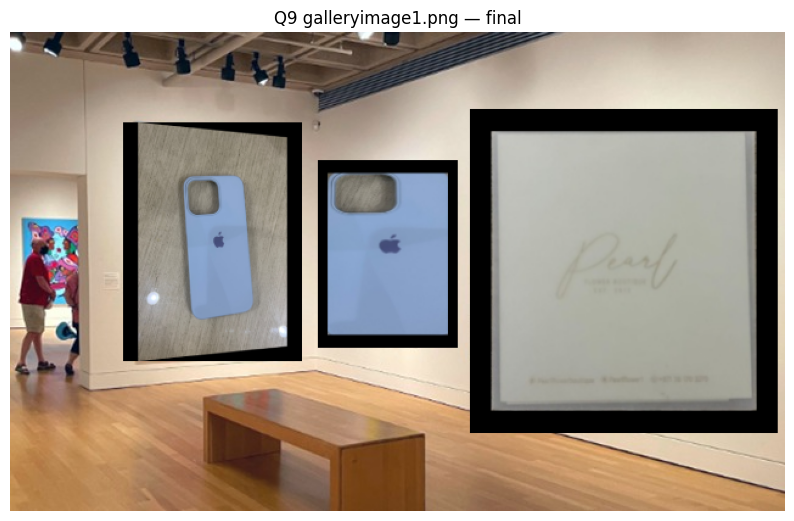

[saved] /content/asg3/outputs/Q9_gallery/galleryimage2_final.jpg


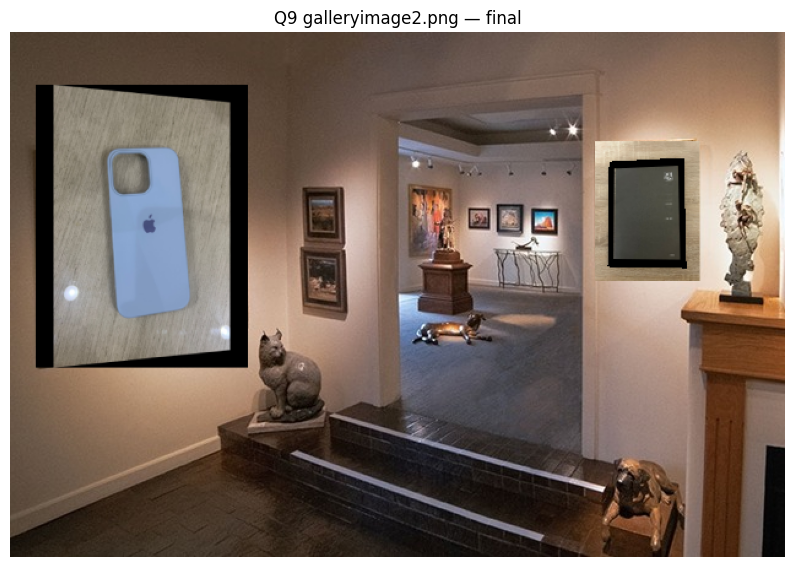

[saved] /content/asg3/outputs/Q9_gallery/galleryimage3_final.jpg


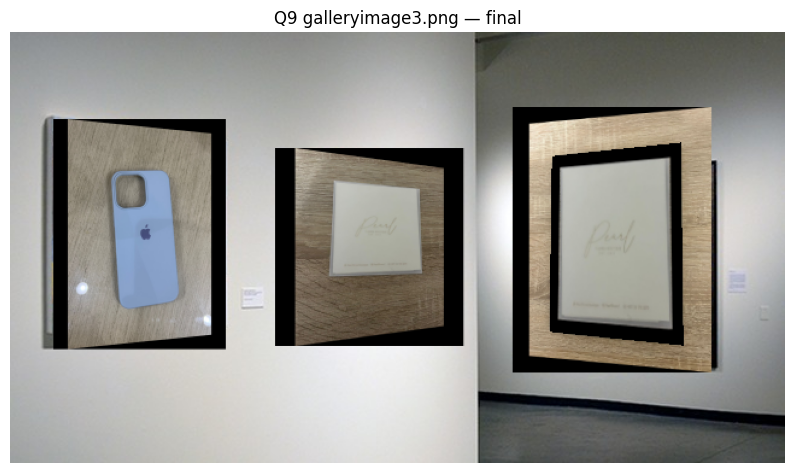


All done. Download ZIP: /content/asg3_outputs.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# MASTER CELL: ASG3 full pipeline (Q3 → Q9) with all previews (incl. Q4 RGB & Q5 grid)
# Works in Google Colab (no GUI windows). One run = uploads → auto-run → ZIP download.

!pip -q install opencv-python-headless numpy matplotlib requests

from pathlib import Path
import numpy as np, cv2 as cv, matplotlib.pyplot as plt, requests, os, shutil
from google.colab import files

# ---------------------- FOLDERS ----------------------
BASE = Path("/content/asg3"); BASE.mkdir(parents=True, exist_ok=True)
IN_OBJECTS = BASE / "inputs" / "objects";  IN_OBJECTS.mkdir(parents=True, exist_ok=True)
IN_GALLERY = BASE / "inputs" / "gallery";  IN_GALLERY.mkdir(parents=True, exist_ok=True)
IN_ART     = BASE / "inputs" / "artworks"; IN_ART.mkdir(parents=True, exist_ok=True)
OUT        = BASE / "outputs";             OUT.mkdir(parents=True, exist_ok=True)

ASG3_URL = "https://images.unsplash.com/photo-1501785888041-af3ef285b470"  # reliable Unsplash
ASG3_PATH = BASE / "ASG3.JPG"

# ---------------------- SMALL UTILS ----------------------
def imshow(title, img, size=6, gray=False):
    plt.figure(figsize=(size,size))
    if gray or (img.ndim == 2):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off'); plt.title(title); plt.show()

def save(subdir, name, img):
    d = OUT / subdir; d.mkdir(parents=True, exist_ok=True)
    p = d / name
    cv.imwrite(str(p), img)
    print(f"[saved] {p}")
    return p

def upload_into(folder: Path, prompt: str):
    print(prompt)
    up = files.upload()
    for name, data in up.items():
        out = folder / name
        with open(out, "wb") as f: f.write(data)
        print("[uploaded]", out)

# ---------------------- UPLOADS ----------------------
print("Upload your 30° object photos (card/cover/notebook) → into 'objects'")
upload_into(IN_OBJECTS, "Choose object images…")
print("\nUpload your gallery backgrounds (galleryimage1/2/3) → into 'gallery'")
upload_into(IN_GALLERY, "Choose gallery backgrounds…")
print("\nUpload your Q3 250×250 top-down images (artworks to hang) → into 'artworks'")
upload_into(IN_ART, "Choose artwork images…")

# ---------------------- CORE HELPERS ----------------------
def order_pts(pts):
    pts = np.array(pts, dtype="float32")
    s = pts.sum(axis=1); d = np.diff(pts, axis=1)
    tl = pts[np.argmin(s)]; br = pts[np.argmax(s)]
    tr = pts[np.argmin(d)]; bl = pts[np.argmax(d)]
    return np.array([tl, tr, br, bl], dtype="float32")

def auto_warp_250(image_bgr):
    gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(gray, (5,5), 0)
    edges = cv.Canny(gray, 50, 150)
    cnts, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.02*peri, True)
        if len(approx) == 4 and cv.contourArea(approx) > 5000:
            rect = order_pts(approx.reshape(4,2))
            dst = np.array([[0,0],[249,0],[249,249],[0,249]], dtype=np.float32)
            M = cv.getPerspectiveTransform(rect, dst)
            warped = cv.warpPerspective(image_bgr, M, (250,250))
            return warped, rect
    return None, None

def add_gaussian_noise(img, var=0.01):
    sigma = var**0.5
    gauss = np.random.normal(0.0, sigma, img.shape).astype(np.float32)
    noisy = img.astype(np.float32) + 255.0*gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_salt_pepper(gray, ps=0.01, pp=0.01):
    out = gray.copy(); h,w = gray.shape[:2]
    nS = int(ps*h*w); ys = np.random.randint(0,h,nS); xs = np.random.randint(0,w,nS); out[ys,xs]=255
    nP = int(pp*h*w); yp = np.random.randint(0,h,nP); xp = np.random.randint(0,w,nP); out[yp,xp]=0
    return out

def median_with_padding(gray, k=5, border=cv.BORDER_CONSTANT, value=0):
    pad = k//2
    padded = cv.copyMakeBorder(gray,pad,pad,pad,pad,border,value=value)
    filt = cv.medianBlur(padded,k)
    return filt[pad:-pad, pad:-pad]

def find_frames_quads(bg):
    g = cv.cvtColor(bg, cv.COLOR_BGR2GRAY)
    g = cv.GaussianBlur(g, (5,5), 0)
    edges = cv.Canny(g, 50, 150)
    cnts, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    quads = []
    for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.02*peri, True)
        area = cv.contourArea(approx)
        if len(approx)==4 and area>5000:
            quads.append(order_pts(approx.reshape(4,2)))
    quads = sorted(quads, key=lambda q: cv.contourArea(q.astype(np.float32)), reverse=True)
    return quads

def warp_art_into_quad(bg, art, quad):
    h = int(max(10, np.linalg.norm(quad[2]-quad[1])))
    w = int(max(10, np.linalg.norm(quad[1]-quad[0])))
    art = cv.resize(art, (w,h))
    src = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], np.float32)
    H = cv.getPerspectiveTransform(src, quad.astype(np.float32))
    warped = cv.warpPerspective(art, H, (bg.shape[1], bg.shape[0]))
    mask = cv.warpPerspective(np.ones((h,w), np.uint8)*255, H, (bg.shape[1], bg.shape[0]))
    mask3 = cv.merge([mask,mask,mask])
    return np.where(mask3>0, warped, bg)

# ---------------------- Q3 ----------------------
def run_q3():
    sub = "Q3_perspective"
    for p in sorted(IN_OBJECTS.glob("*")):
        img = cv.imread(str(p))
        if img is None: print("[skip]", p); continue
        warped, rect = auto_warp_250(img)
        if warped is None:
            print(f"[warn] no rectangle found in {p.name}"); continue
        save(sub, f"{p.stem}_topdown_250.jpg", warped)
        imshow(f"Q3 {p.name} → 250×250", warped, size=4)

# ---------------------- Q4 (with RGB GRID) ----------------------
def run_q4():
    sub = "Q4_pixel_ops"
    if ASG3_PATH.exists():
        img = cv.imread(str(ASG3_PATH))
    else:
        print("[info] downloading ASG3.JPG from Unsplash…")
        r = requests.get(ASG3_URL, headers={"User-Agent":"Mozilla/5.0"})
        arr = np.frombuffer(r.content, np.uint8)
        img = cv.imdecode(arr, cv.IMREAD_COLOR)
        cv.imwrite(str(ASG3_PATH), img)
        print(f"[saved] {ASG3_PATH}")

    r400 = cv.resize(img, (400,400))
    B,G,R = cv.split(r400)
    red   = cv.merge([np.zeros_like(R), np.zeros_like(R), R])
    green = cv.merge([np.zeros_like(G), G, np.zeros_like(G)])
    blue  = cv.merge([B, np.zeros_like(B), np.zeros_like(B)])
    gray  = cv.cvtColor(r400, cv.COLOR_BGR2GRAY)
    mir   = cv.flip(gray, 1)
    add50 = cv.add(mir, 50)
    up800 = cv.resize(add50, (800,800), interpolation=cv.INTER_CUBIC)

    save(sub, "ASG3_400x400.jpg", r400)
    save(sub, "ASG3_R.jpg", red)
    save(sub, "ASG3_G.jpg", green)
    save(sub, "ASG3_B.jpg", blue)
    save(sub, "ASG3_gray_mirror_add50.jpg", add50)
    save(sub, "ASG3_gray_upscaled_800x800.jpg", up800)

    # ---- Q4 GRID (includes RGB) ----
    fig, axes = plt.subplots(2,3, figsize=(15,10))
    grid = [
        ("Resized 400×400", r400),
        ("Red channel", red),
        ("Green channel", green),
        ("Blue channel", blue),
        ("Gray mirrored +50", cv.cvtColor(add50, cv.COLOR_GRAY2BGR)),
        ("Upscaled 800×800 (gray)", cv.cvtColor(up800, cv.COLOR_GRAY2BGR)),
    ]
    for ax, (title, im) in zip(axes.flat, grid):
        ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB) if im.ndim==3 else im, cmap=None if im.ndim==3 else "gray")
        ax.set_title(title); ax.axis("off")
    plt.tight_layout(); plt.show()

    return r400

# ---------------------- Q5 (with FILTER GRID) ----------------------
def run_q5(r400):
    sub = "Q5_filters"
    noisy = add_gaussian_noise(r400, var=0.01)
    save(sub, "T5_noisy.jpg", noisy)
    imgs = [("Noisy", noisy)]
    for k in [3,5,7]:
        s = cv.blur(noisy,(k,k)); m = cv.medianBlur(noisy,k); g = cv.GaussianBlur(noisy,(k,k),0)
        save(sub, f"T5_smooth_{k}x{k}.jpg", s)
        save(sub, f"T5_median_{k}x{k}.jpg", m)
        save(sub, f"T5_gaussian_{k}x{k}.jpg", g)
        imgs += [(f"Smooth {k}×{k}", s), (f"Median {k}×{k}", m), (f"Gaussian {k}×{k}", g)]

    # ---- Q5 GRID (3 rows: Smooth / Median / Gaussian) ----
    titles = ["Noisy", "Smooth 3×3", "Smooth 5×5", "Smooth 7×7",
              "Median 3×3", "Median 5×5", "Median 7×7",
              "Gaussian 3×3", "Gaussian 5×5", "Gaussian 7×7"]
    images = [noisy,
              cv.blur(noisy,(3,3)), cv.blur(noisy,(5,5)), cv.blur(noisy,(7,7)),
              cv.medianBlur(noisy,3), cv.medianBlur(noisy,5), cv.medianBlur(noisy,7),
              cv.GaussianBlur(noisy,(3,3),0), cv.GaussianBlur(noisy,(5,5),0), cv.GaussianBlur(noisy,(7,7),0)]
    fig, axes = plt.subplots(3,4, figsize=(16,12))
    for ax in axes.flat: ax.axis("off")
    for i,(t,im) in enumerate(zip(titles, images)):
        r = i//4; c = i%4
        axes[r,c].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
        axes[r,c].set_title(t); axes[r,c].axis("off")
    plt.tight_layout(); plt.show()

# ---------------------- Q6 ----------------------
def run_q6(r400):
    sub = "Q6_sp"
    gray = cv.cvtColor(r400, cv.COLOR_BGR2GRAY)
    sp = add_salt_pepper(gray, 0.01, 0.01)
    save(sub, "T6_sp_noisy.jpg", sp)
    z  = median_with_padding(sp,5,cv.BORDER_CONSTANT,0)
    c  = median_with_padding(sp,5,cv.BORDER_WRAP)
    s  = median_with_padding(sp,5,cv.BORDER_REFLECT)
    save(sub, "T6_median_5x5_zero.jpg", z)
    save(sub, "T6_median_5x5_circular.jpg", c)
    save(sub, "T6_median_5x5_symm.jpg", s)
    imshow("Q6 (noisy vs symmetric)", np.hstack([sp, s]), size=10)

# ---------------------- Q7 ----------------------
def run_q7(r400):
    sub = "Q7_sharpen"
    k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], np.float32)
    sharp = cv.filter2D(r400, -1, k)
    save(sub, "T7_original_400x400.jpg", r400)
    save(sub, "T7_sharpen_400x400.jpg", sharp)
    imshow("Q7 (original vs sharpened)", np.hstack([r400, sharp]), size=10)

# ---------------------- Q8 ----------------------
def run_q8(r400):
    sub = "Q8_threshold"
    gray = cv.cvtColor(r400, cv.COLOR_BGR2GRAY)
    _, th = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)
    save(sub, "T8_gray_400x400.jpg", gray)
    save(sub, "T8_threshold_400x400.jpg", th)
    imshow("Q8 (gray vs thresholded)", np.hstack([gray, th]), size=10, gray=True)

# ---------------------- Q9 (auto frame detection) ----------------------
def run_q9():
    sub = "Q9_gallery"
    arts = sorted([p for p in IN_ART.glob("*")])
    gals = sorted([p for p in IN_GALLERY.glob("*")])
    if not arts or not gals:
        print("[!] Put images into inputs/artworks and inputs/gallery first."); return
    art_idx = 0
    for gp in gals:
        bg = cv.imread(str(gp))
        if bg is None: print("[skip]", gp); continue
        quads = find_frames_quads(bg)
        if not quads: print(f"[warn] no frames detected in {gp.name}"); continue
        canvas = bg.copy()
        for quad in quads:
            art = cv.imread(str(arts[art_idx % len(arts)]))
            if art is None: art_idx += 1; continue
            art = cv.copyMakeBorder(art, 20,20,20,20, cv.BORDER_CONSTANT, value=(0,0,0))
            canvas = warp_art_into_quad(canvas, art, quad)
            art_idx += 1
        save(sub, f"{gp.stem}_final.jpg", canvas)
        imshow(f"Q9 {gp.name} — final", canvas, size=10)

# ---------------------- RUN EVERYTHING ----------------------
print("\n=== Running Q3 → Q9 automatically ===")
run_q3()
r400 = run_q4()
run_q5(r400)
run_q6(r400)
run_q7(r400)
run_q8(r400)
run_q9()

# ZIP outputs for download
zip_path = "/content/asg3_outputs.zip"
if os.path.exists(zip_path): os.remove(zip_path)
shutil.make_archive("/content/asg3_outputs", 'zip', OUT)
print(f"\nAll done. Download ZIP: {zip_path}")
files.download(zip_path)
